# Lab 1 | Sounds and signals

### Made by Dmitriy Sokolov, 3530901/00203

Firstly, prepare the environment

In [1]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


### Part 1

Now, insert the sound with human's scream voice

In [2]:
from labs.thinkdsp import read_wave

wave = read_wave('human-male-scream.wav')
wave.normalize()
wave.make_audio()

And plot it

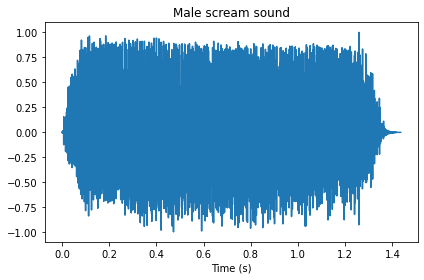

In [3]:
from labs.thinkdsp import decorate

wave.plot()
decorate(xlabel='Time (s)', title="Male scream sound")

Make voice segment (with a duration of 0.5 sec) from the wave with nearly equal height

In [4]:
segment = wave.segment(start=0.5, duration=0.5)
segment.make_audio()

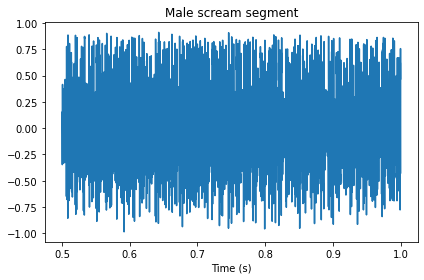

In [5]:
segment.plot()
decorate(xlabel='Time (s)', title="Male scream segment")

Here's what the spectrum of the segment looks like:

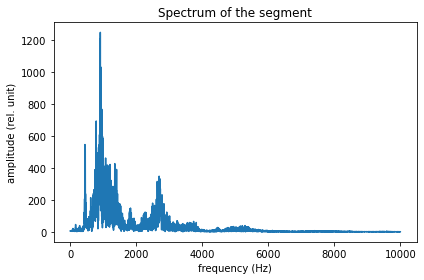

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot(high=10000)
decorate(xlabel='frequency (Hz)', ylabel='amplitude (rel. unit)', title="Spectrum of the segment")

We can see that it has a lot of frequency components.
As for **bounds of the timbre and spectrum harmonic structure**, the timbre is a *set of a sound harmonics (amplitude of all frequencies)*.

So, it can be seen that there is a high amplitude in a portion of a low frequency , that's why we can hear the "lowness" of a man scream

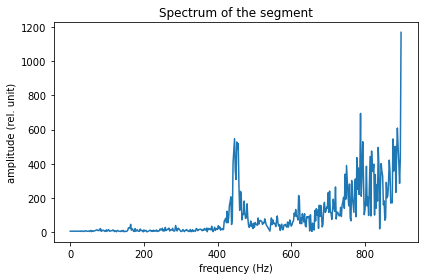

In [7]:
spectrum.plot(high=900)
decorate(xlabel='frequency (Hz)', ylabel='amplitude (rel. unit)', title="Spectrum of the segment")

Top-30 frequencies by amplitude:

In [8]:
spectrum.peaks()[:30]

[(1249.7728666937962, 912.0),
 (1208.7111472920312, 906.0),
 (1168.292715087698, 898.0),
 (1127.2047367639361, 908.0),
 (1112.7831436124306, 900.0),
 (1032.674638055481, 926.0),
 (983.7924487334903, 928.0),
 (886.0826548659732, 918.0),
 (768.3796131079803, 956.0),
 (726.7673553345991, 920.0),
 (695.2473346774724, 910.0),
 (694.4035938775053, 788.0),
 (645.7638405046064, 902.0),
 (627.5261467290795, 930.0),
 (608.6812103841086, 888.0),
 (596.8555232374624, 978.0),
 (585.7741654532427, 984.0),
 (554.2654708232259, 964.0),
 (547.0535652216773, 446.0),
 (544.9630294097292, 876.0),
 (531.574939193106, 974.0),
 (528.8882805010912, 794.0),
 (527.159540589005, 452.0),
 (517.8297327887495, 456.0),
 (511.2160029659991, 904.0),
 (501.8640677295388, 882.0),
 (495.66290877062545, 836.0),
 (494.64798807907357, 890.0),
 (488.20482502386926, 454.0),
 (475.712289871491, 962.0)]

The dominant peak is at 912 Hz:

In [9]:
spectrum.peaks()[0]

(1249.7728666937962, 912.0)

Then, filter out high frequencies (>= 3000 Hz):

In [10]:
spectrum.low_pass(cutoff=2000, factor=0.01)
spectrum.make_wave().make_audio()

In [11]:
spectrum.high_pass(cutoff=400, factor=0.01)
spectrum.make_wave().make_audio()

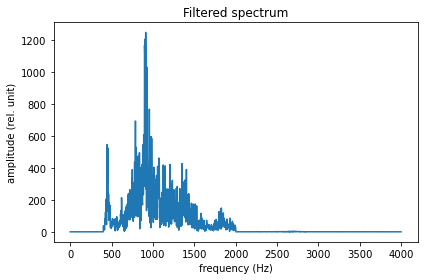

In [12]:
spectrum.plot(high=4000)
decorate(xlabel='frequency (Hz)', ylabel='amplitude (rel. unit)', title="Filtered spectrum")

As we can hear, the sound became dull, some distant, like it comes from somewhere far away.
It is similar with sound we can here during the phone dialog (2G, 3G, slow Internet connection)

### Part 2

Here we should create the result signal by creating and adding SinSignal and CosSignal objects.

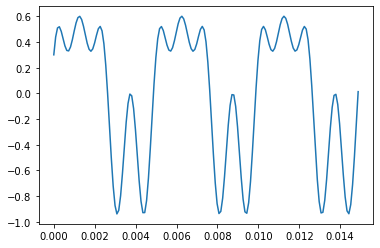

In [13]:
from labs.thinkdsp import SinSignal, CosSignal

signal = (SinSignal(freq=600, amp=0.3) +
          SinSignal(freq=200, amp=0.6) +
          CosSignal(freq=800, amp=0.3))
signal.plot()

Create the sound from the signal

In [14]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

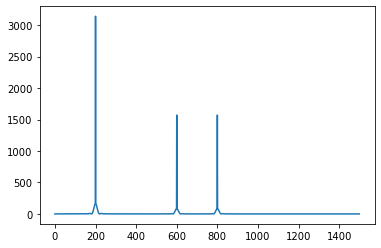

In [15]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=1500)

In [16]:
signal += SinSignal(freq=430)
signal.make_wave().make_audio()

We can see 3 components at the spectrum on 200, 600 and 800 Hz (equal in number of previously created signals).
Created signals are multiple of 200 each, and we can here uniform, steady sound. But if we create non-multiple signals (for example with 250 and 340 frequency or 430), we will hear time-varying signal intensity (distorting).

### Part 3

Finally, we should scale the original (Part 1) wave in the function *stretch*:

In [17]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Reload the screaming signal and scale it:

In [18]:
wave_scaled = read_wave('human-male-scream.wav')
wave_scaled.normalize()
stretch(wave_scaled, 0.5) # funny child speedy screaming
wave_scaled.make_audio()

Or like this, slow mammoth cry:

In [19]:
wave_slow = read_wave('human-male-scream.wav')
wave_slow.normalize()
stretch(wave_slow, 2) # funny child speedy screaming
wave_slow.make_audio()

Finally, we created and handled signals, dropped/filtered frequencies from the signal spectrum and so on